# Recall Plots

In [1]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

target_folder = 'MMSR25-26-Group-E'
current_path = os.getcwd()

while os.path.basename(current_path) != target_folder:
    if os.path.basename(current_path) == 'RetrievalAlgorithm':
        if os.path.join(current_path) not in sys.path:
            sys.path.append(os.path.join(current_path))
    parent = os.path.dirname(current_path)
    os.chdir(parent)
    current_path = parent
print(current_path)

from RetrievalAlgorithm.src.utils.plotting import plot_metrics_at_k, plot_describe_heatmaps

D:\University\7th_Semester\multimedia_search_and_retrieval\MMSR25-26-Group-E


In [2]:
norm_names = ['max_abs', 'min_max', 'raw', 'standard', 'robust']
metric_name = 'Recall'
figs_dict = {}

## Unimodal

### Load Data

In [3]:
lyrics_dfs = {
    norm_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/unimodal/{norm_name}/unimodal_{norm_name}_lyrics_{metric_name.lower()}.parquet'
    )
    for norm_name in tqdm(norm_names, desc=f'Loading Unimodal Lyrics {metric_name}')
}

audio_dfs = {
    norm_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/unimodal/{norm_name}/unimodal_{norm_name}_audio_{metric_name.lower()}.parquet'
    )
    for norm_name in tqdm(norm_names, desc=f'Loading Unimodal Audio {metric_name}')
}

video_dfs =  {
    norm_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/unimodal/{norm_name}/unimodal_{norm_name.lower()}_video_{metric_name}.parquet'
    )
    for norm_name in tqdm(norm_names, desc=f'Loading Unimodal Video {metric_name}')
}

Loading Unimodal Video Recall: 100%|██████████| 5/5 [00:00<00:00, 187.40it/s]


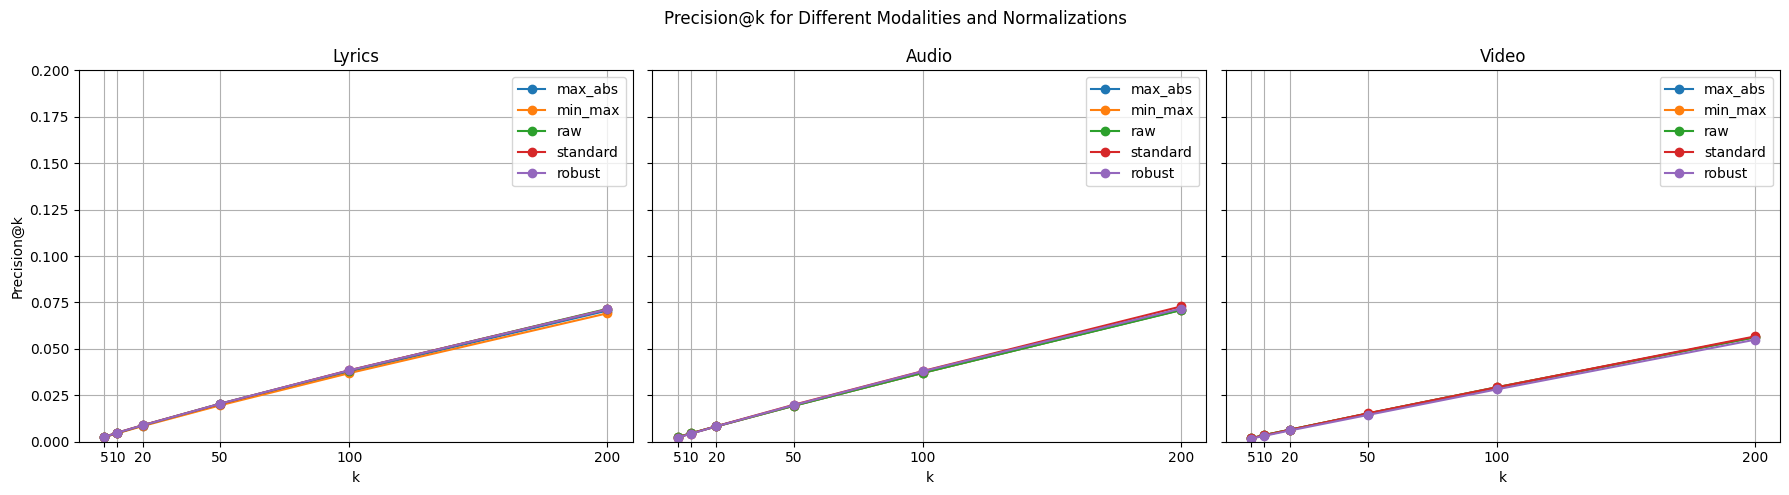

In [4]:
figs_dict[f'unimodal_{metric_name.lower()}_mean_line_plot'] = plot_metrics_at_k(
    modality_dfs=[lyrics_dfs, audio_dfs, video_dfs],
    modality_names=['Lyrics', 'Audio', 'Video'],
    y_lim_high=0.2
)

### Lyrics (BERT)

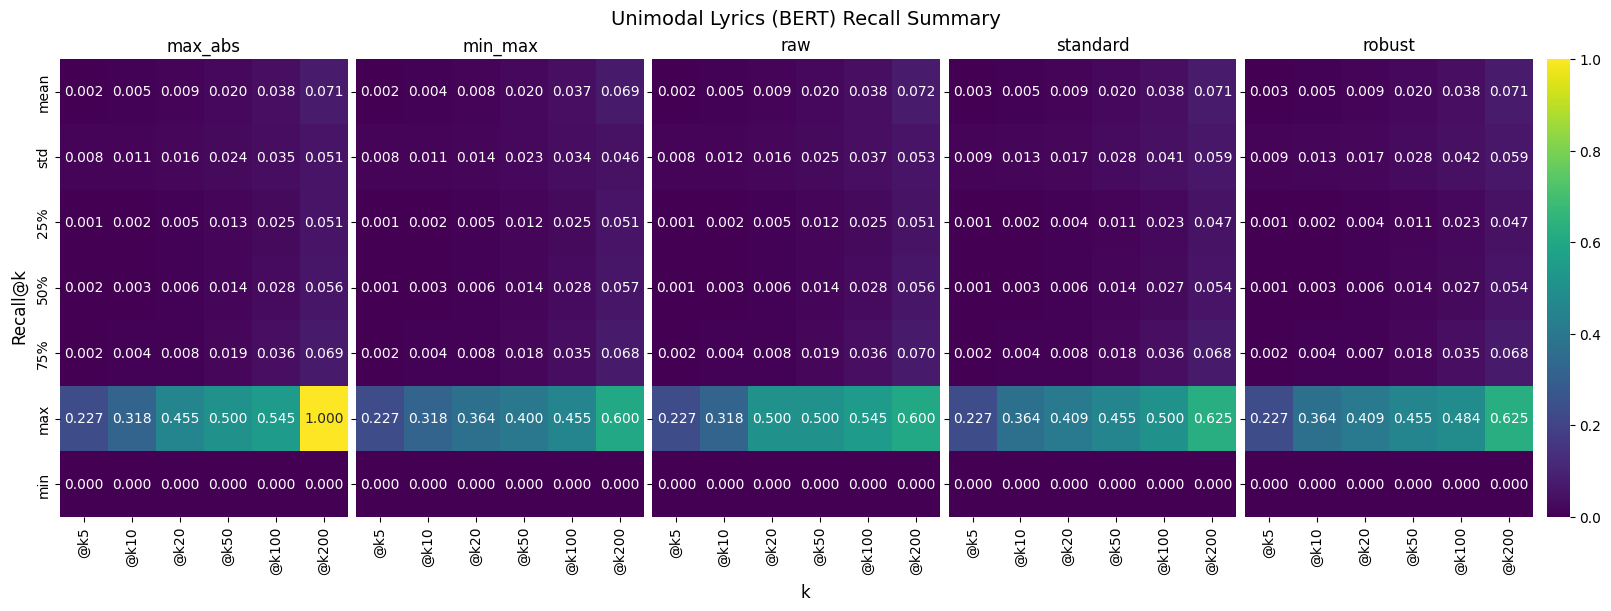

In [5]:
figs_dict[f'unimodal_lyrics_{metric_name.lower()}_summary'] = plot_describe_heatmaps(dfs=lyrics_dfs,
                       fig_title=f'Unimodal Lyrics (BERT) {metric_name} Summary',
                       x_label='k',
                       y_label=f'{metric_name}@k',
                       decimal_positions=3,
                       figsize=(16,6))

### Audio (MFCC)

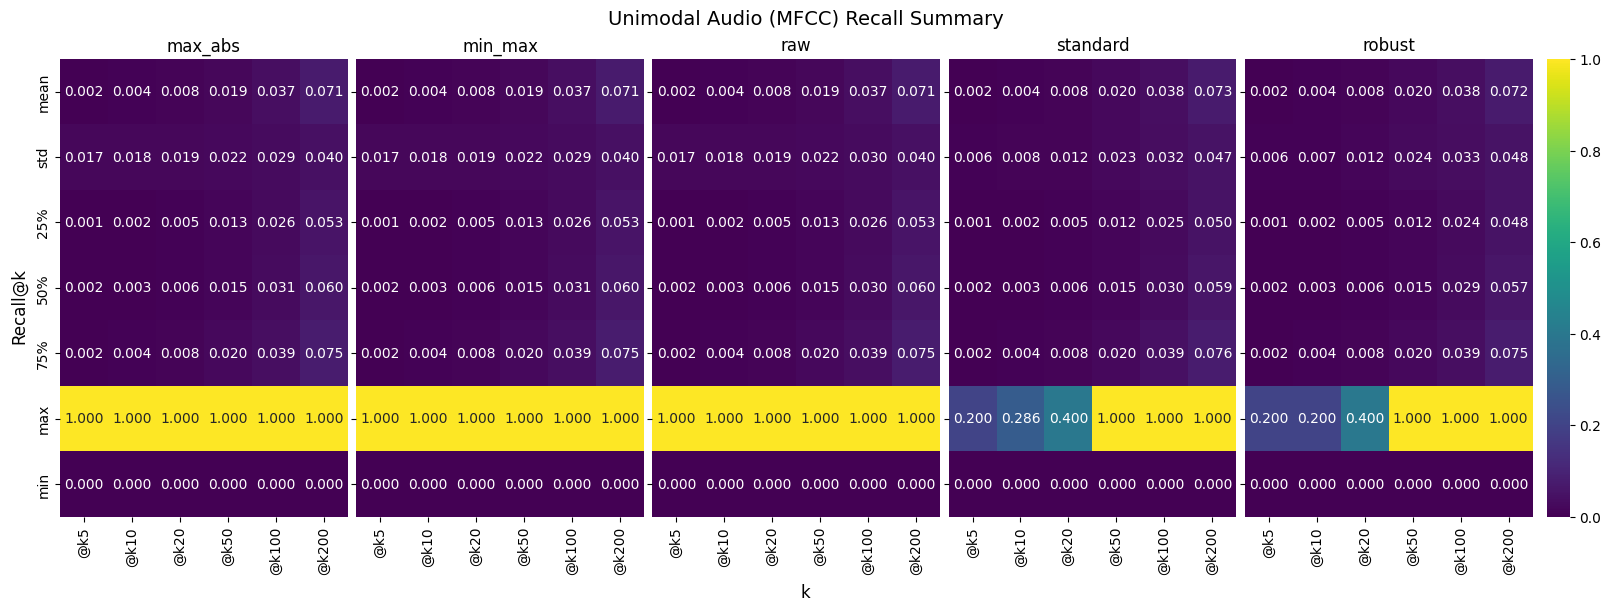

In [6]:
figs_dict[f'unimodal_audio_{metric_name.lower()}_summary'] = plot_describe_heatmaps(dfs=audio_dfs,
                       fig_title=f'Unimodal Audio (MFCC) {metric_name} Summary',
                       x_label='k',
                       y_label=f'{metric_name}@k',
                       decimal_positions=3,
                       figsize=(16,6))

### Video (VGG19)

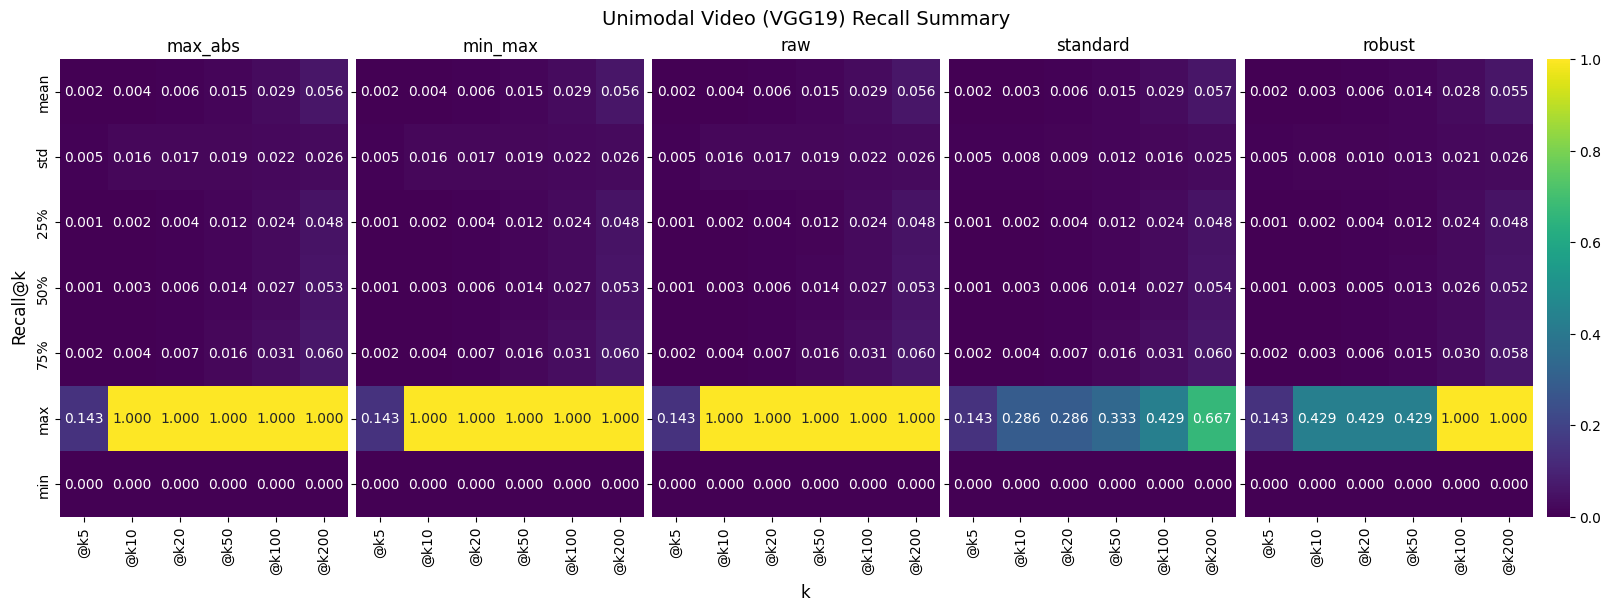

In [7]:
figs_dict[f'unimodal_video_{metric_name.lower()}_summary'] = plot_describe_heatmaps(dfs=video_dfs,
                       fig_title=f'Unimodal Video (VGG19) {metric_name} Summary',
                       x_label='k',
                       y_label=f'{metric_name}@k',
                       decimal_positions=3,
                       figsize=(16,6))

In [8]:
del lyrics_dfs, audio_dfs, video_dfs

## Multimodal (Early Fusion)

In [9]:
audio_video_dfs = {
    norm_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/multimodal/early_fusion/{norm_name}/multimodal_{norm_name}_audio_videoclips_{metric_name.lower()}.parquet'
    )
    for norm_name in tqdm(norm_names, desc=f'Loading Multimodal Audio+Video {metric_name}')
}

lyrics_audio_dfs = {
    norm_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/multimodal/early_fusion/{norm_name}/multimodal_{norm_name}_lyrics_audio_{metric_name.lower()}.parquet'
    )
    for norm_name in tqdm(norm_names, desc=f'Loading Multimodal Lyrics+Audio {metric_name}')
}

lyrics_video_dfs =  {
    norm_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/multimodal/early_fusion/{norm_name}/multimodal_{norm_name}_lyrics_videoclips_{metric_name.lower()}.parquet'
    )
    for norm_name in tqdm(norm_names, desc=f'Loading Multimodal Lyrics+Video {metric_name}')
}

lyrics_audio_video_dfs =  {
    norm_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/multimodal/early_fusion/{norm_name}/multimodal_{norm_name}_lyrics_audio_videoclips_{metric_name.lower()}.parquet'
    )
    for norm_name in tqdm(norm_names, desc=f'Loading Multimodal Lyrics+Audio+Video {metric_name}')
}

Loading Multimodal Lyrics+Audio+Video Recall: 100%|██████████| 5/5 [00:00<00:00, 224.55it/s]


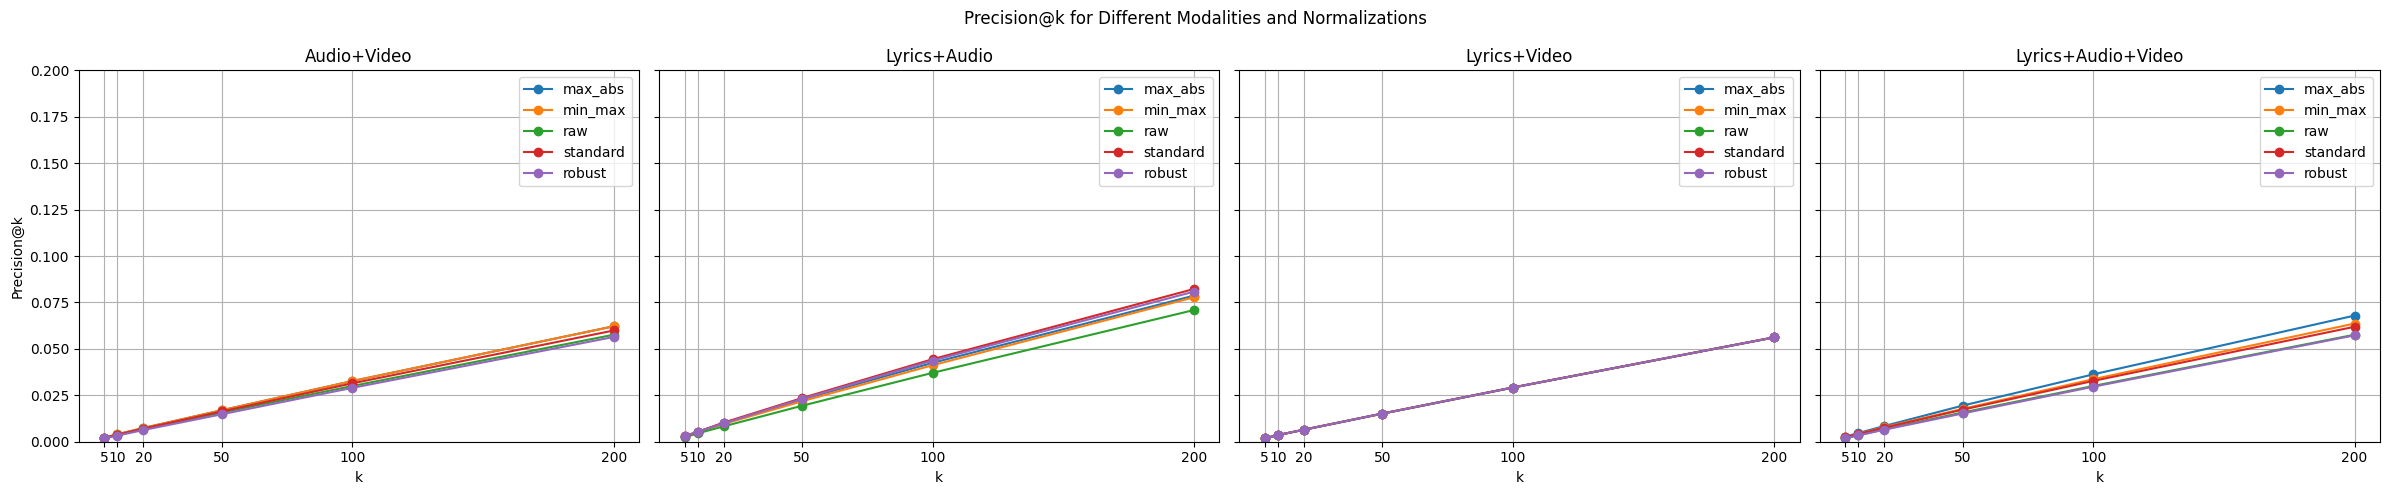

In [10]:
figs_dict[f'multimodal_early_fusion_{metric_name.lower()}_mean_line_plot'] = plot_metrics_at_k(
    modality_dfs=[audio_video_dfs, lyrics_audio_dfs, lyrics_video_dfs, lyrics_audio_video_dfs],
    modality_names=['Audio+Video', 'Lyrics+Audio', 'Lyrics+Video', 'Lyrics+Audio+Video'],
    y_lim_high=0.2
)

### Audio + Video

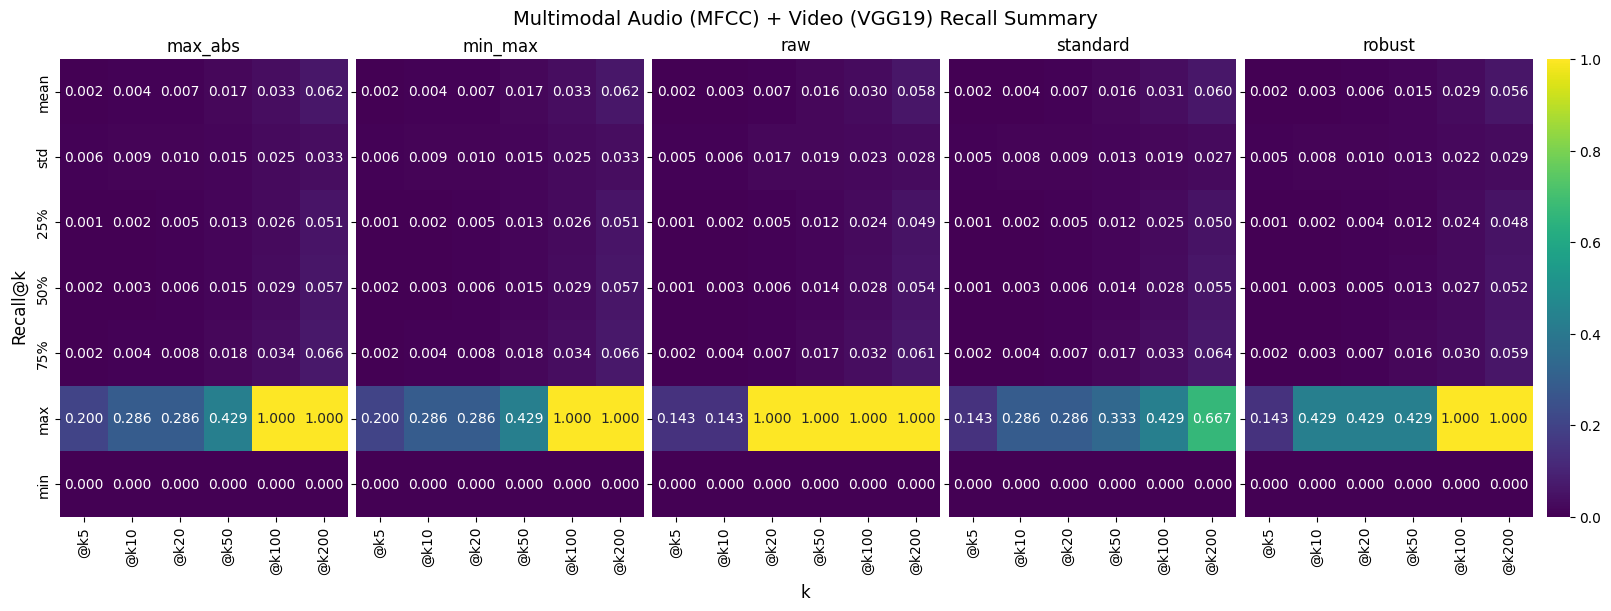

In [11]:
figs_dict[f'multimodal_audio_video_{metric_name.lower()}_summary'] = plot_describe_heatmaps(dfs=audio_video_dfs,
                       fig_title=f'Multimodal Audio (MFCC) + Video (VGG19) {metric_name} Summary',
                       x_label='k',
                       y_label=f'{metric_name}@k',
                       decimal_positions=3,
                       figsize=(16,6))

### Lyrics + Audio

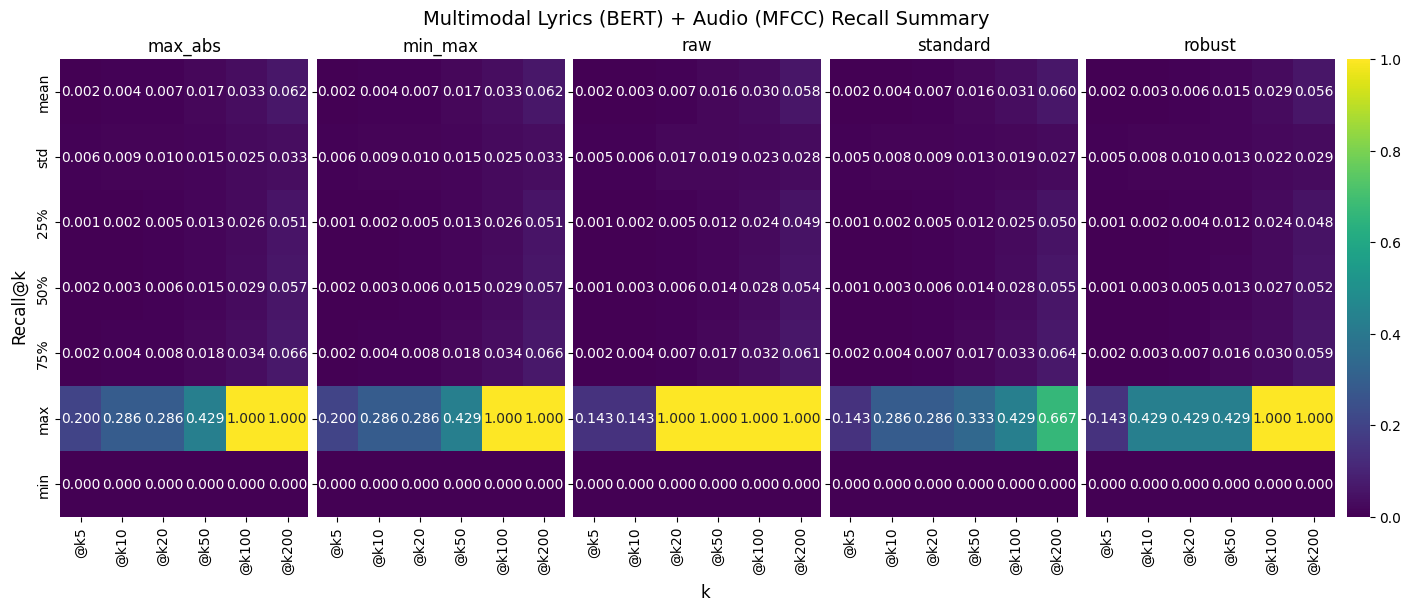

In [12]:
figs_dict[f'multimodal_lyrics_audio_{metric_name.lower()}_summary'] = plot_describe_heatmaps(dfs=audio_video_dfs,
                       fig_title=f'Multimodal Lyrics (BERT) + Audio (MFCC) {metric_name} Summary',
                       x_label='k',
                       y_label=f'{metric_name}@k',
                       decimal_positions=3,)

### Lyrics + Video

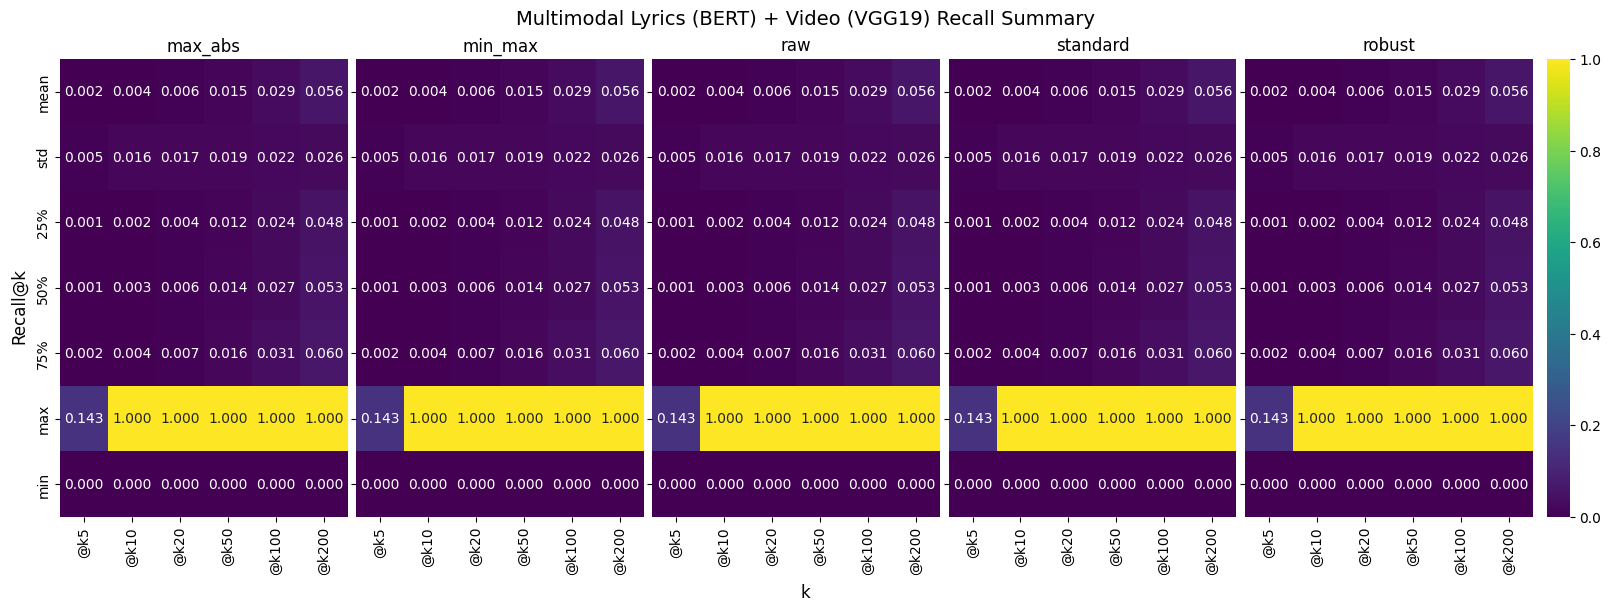

In [13]:
figs_dict[f'multimodal_lyrics_video_{metric_name.lower()}_summary'] = plot_describe_heatmaps(dfs=lyrics_video_dfs,
                       fig_title=f'Multimodal Lyrics (BERT) + Video (VGG19) {metric_name} Summary',
                       x_label='k',
                       y_label=f'{metric_name}@k',
                       decimal_positions=3,
                       figsize=(16,6))

### Lyrics + Audio + Video

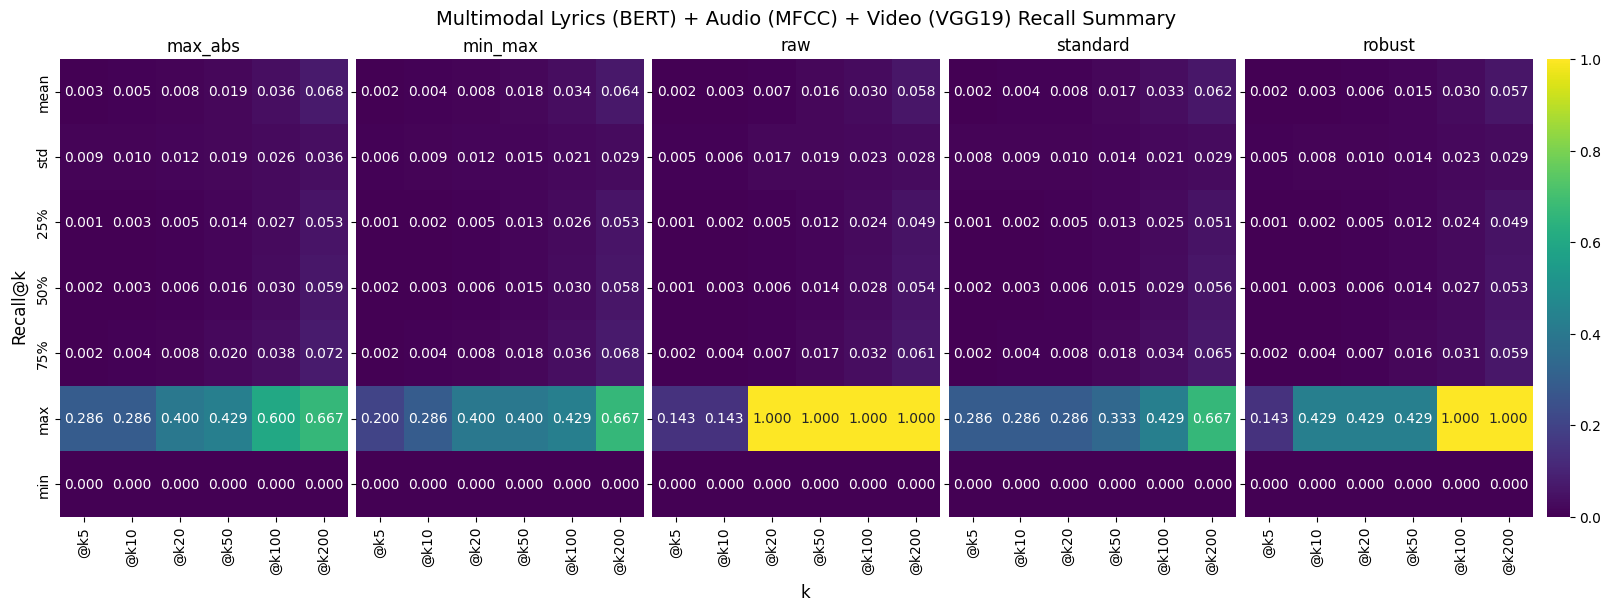

In [14]:
figs_dict[f'multimodal_lyrics_audio_video_{metric_name.lower()}_summary'] = plot_describe_heatmaps(dfs=lyrics_audio_video_dfs,
                       fig_title=f'Multimodal Lyrics (BERT) + Audio (MFCC) + Video (VGG19) {metric_name} Summary',
                       x_label='k',
                       y_label=f'{metric_name}@k',
                       decimal_positions=3,
                       figsize=(16,6))

In [15]:
del audio_video_dfs, lyrics_audio_dfs, lyrics_video_dfs, lyrics_audio_video_dfs

## Multimodal (Late Fusion - Max Score)

In [16]:
max_scores_dfs = {
    norm_name: pd.read_parquet(
        f'RetrievalAlgorithm/results/multimodal/late_fusion/max_score/multimodal_{norm_name}_max_{metric_name.lower()}.parquet'
    )
    for norm_name in tqdm(norm_names, desc=f'Loading Multimodal Max Score {metric_name}')
}

Loading Multimodal Max Score Recall: 100%|██████████| 5/5 [00:00<00:00, 202.91it/s]


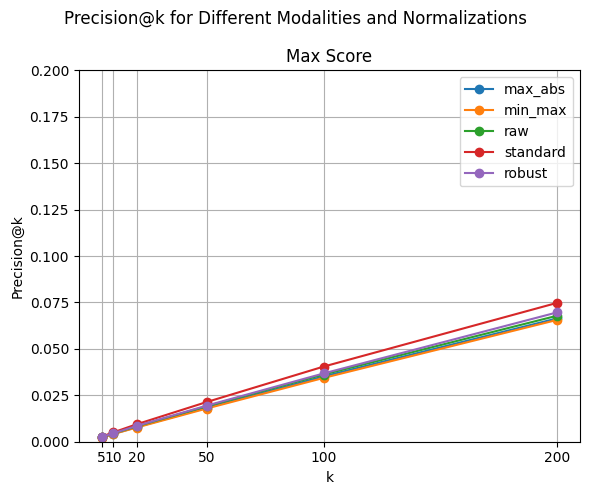

In [17]:
figs_dict[f'multimodal_late_fusion_{metric_name.lower()}_mean_line_plot'] = plot_metrics_at_k(
    modality_dfs=[max_scores_dfs],
    modality_names=['Max Score'],
    y_lim_high=0.2
)

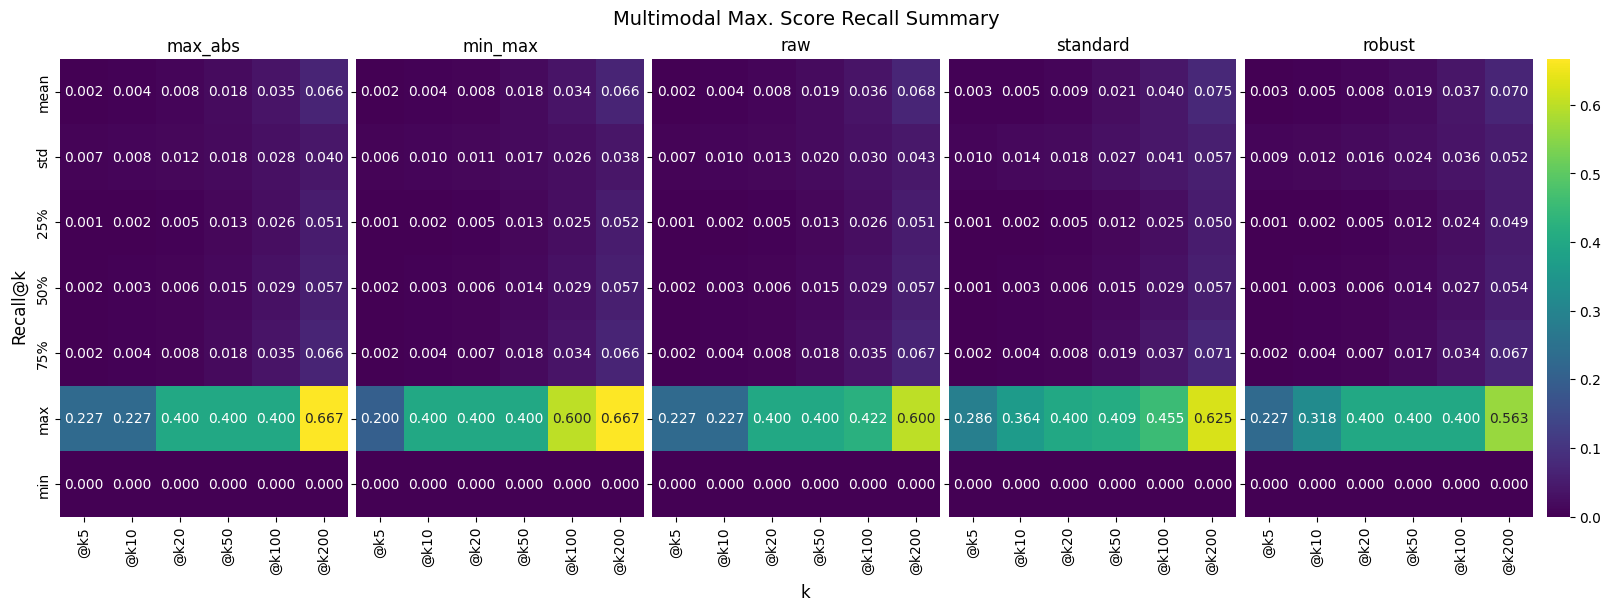

In [18]:
figs_dict[f'multimodal_max_score_{metric_name.lower()}_summary'] = plot_describe_heatmaps(dfs=max_scores_dfs,
                       fig_title=f'Multimodal Max. Score {metric_name} Summary',
                       x_label='k',
                       y_label=f'{metric_name}@k',
                       decimal_positions=3,
                       figsize=(16,6))

## Save Plots as Files

In [19]:
folder_path = f"RetrievalAlgorithm/plots/{metric_name.lower()}"
os.makedirs(folder_path, exist_ok=True)

for name, fig in figs_dict.items():
    file_path = os.path.join(folder_path, f'{name}.png')
    fig.savefig(file_path)
    plt.close(fig)

print(f'Saved {len(figs_dict)} figures to {folder_path}')

Saved 11 figures to RetrievalAlgorithm/plots/recall
